In [1]:
import numpy as np
import spacy
import json

In [2]:
nlp = spacy.load('en_core_web_lg')

In [31]:
def alter(token, wonkiness):
    vec = token.vector.reshape(1, -1)
    if wonkiness == 0:
        return nlp.vocab[token.text]
    key = nlp.vocab.vectors.most_similar(vec, n=wonkiness)[0][:, wonkiness-1]
    return nlp.vocab[key]

In [34]:
VOWELS = 'aeiouy'
def hyphen8(word):
   first_vowels = list(filter(lambda x: x!=-1, [word.lower().find(v) for v in VOWELS]))
   return '-'.join((int(abs(np.random.randn()*2))+1) * [word[:min(first_vowels)]]) + word[min(first_vowels):] if (len(word)>2 and len(first_vowels)>0 and word[0].isalpha()) and word[0].lower() not in VOWELS else word


In [36]:
with open("h-aha.txt", 'r') as f:
    np.random.seed(8)
    text = f.read()
    parsed = nlp(text)
    for token in parsed:
        variation = 10
        wonkiness = np.abs(int(variation * np.random.randn())) if not token.is_punct and token.vector_norm > 0.5 else 0
        debug = False
        debug_data = f'({repr(token.text)}, {wonkiness})' if debug else ''
        print(hyphen8(alter(token, wonkiness).text) + debug_data, end=token.whitespace_)

Pr-Pr-President P-P-P-Pitzer, mrs. D-D-D-D-Director Ch-Ch-Ch-Ch-Chief, S-SENATOR, L-L-L-Legislator J-John, S-Senator Gregory, and C-C-Congressman Smith, MR mitchell, Mr CHIME, r-r-researchers, Distinguished GUESTS, AND L-L-Lady AND G-GENTLEMEN:

I APPRECIATE your PR-PRESIDENT L-L-LEAST th-th-theY s-s-s-someONE aN H-H-H-HONORS V-VISIT ASSOCIATE, AnD Cant SH-SHOULD Ensure yoU ThAT Own LAST L-L-LECTURE WiLL be extremely briefly.

ive 'm d-delighted tO be HEre, aNd Cant're Especially gr-gr-gr-gr-grateful TO m-m-must h-h-h-h-here on th-thIS OCCASION.

We meet t-t-tIme ANother st-st-st-st-st-student Indicated f-f-f-foR kn-knowledge, Thr-Throughout oNE C-C-Cities s-s-suggested ANd progress, iN A N-N-Nation STATED anD STR-STRONGER, W-W-Well wE sit iN Need all th-those THR-THREE, For believe meet THR-THROUGHOUT another h-h-h-h-hour of ch-changing b-both EFFORT, W-Within a 1990s Th-The H-HOpe aNd F-F-FEAR, INTO an years ThE those KNOWLEDGE and INDIFFERENCE. tH-tH-tHe significant TH-THEIR l-l-lea

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt

In [77]:
def fixed_point(token, n, previous_lexeme):
    vec = token.vector.reshape(1, -1)
    most_sim = nlp.vocab.vectors.most_similar(vec, n=n, sort=True)
    for key, best_row, score in zip(list(most_sim[0].T),list(most_sim[1].T),list(most_sim[2].T)):
        if nlp.vocab[key[0]] not in previous_lexeme:
            return (nlp.vocab[key[0]], score)
    return fixed_point(token, 2*n, previous_lexeme)

In [78]:
def dist(base, other):
    return np.linalg.norm(base.vector - other.vector)

In [ ]:
previous_lexeme = set()
start = nlp.vocab["1"]
number = start
score = [1]
nums = []
scores = []
for i in range(25):
    print(number.text, score)
    nums.append(int(number.text))
    scores.append(score[0])
    previous_lexeme.add(number)
    number, score = fixed_point(number, 10, previous_lexeme)

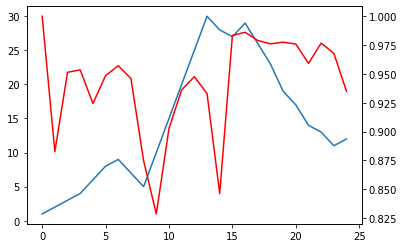

In [85]:
fig, ax1 = plt.subplots()
ax1.plot(nums)
ax2 = ax1.twinx()
ax2.plot(scores, c='r')
fig.show()